Mohammad AFANDI

Pauline HU

16/11/2018

## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la

import pandas as pd

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
train = np.loadtxt('synth_train.txt')

test = np.loadtxt('synth_test.txt')

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


## Initiating a sampling of a 2D plan

This following code will be used to create a sampling of the 2D plan [-2.5 , 1.5] x [-0.5 , 4] with 1000 points.

In [3]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,4,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)   
x = np.vstack((X1.flatten(),np.flip(X2, axis=0).flatten())).T  # list of the coordinates of the points on the grid 
N = size(x,axis=0)
N1 = len(X1)
N2 = len(X2)

# Then compute the sampled prediction class_L for each couple (X1,X2)

This following code will be used to create a sampling of the 2D plan [-2.5 , 1.5] x [-0.5 , 4] with 1000 points.

In [4]:
x = np.vstack((X1.flatten(),np.flip(X2, axis=0).flatten())).T
x

array([[-2.5       ,  4.        ],
       [-2.45959596,  4.        ],
       [-2.41919192,  4.        ],
       ...,
       [ 1.41919192, -0.5       ],
       [ 1.45959596, -0.5       ],
       [ 1.5       , -0.5       ]])

## Estimation of the data parameters

We should first split the datasets for each class.

In [5]:
train_1 = train[train[:,0]==1][:,1:]
n1 = len(train_1)

In [6]:
train_2 = train[train[:,0]==2][:,1:]
n2 = len(train_2)

We should also prepare the train and test set.

In [7]:
trainset = train[:,1:]
testset = test[:,1:]

We should then compute the estimated parameters $\pi_{i}, \mu_{i},\Sigma_{i}$ and $\Sigma$.

In [8]:
pi_1 = len(train_1)/len(train)
pi_2 = len(train_2)/len(train)

In [9]:
mu_1 = np.mean(train_1,axis=0)
mu_2 = np.mean(train_2,axis=0)

In [10]:
sigma_1 = np.cov(train_1.T)
sigma_2 = np.cov(train_2.T)

In [11]:
sigma = 1/len(train)*(n1*sigma_1+n2*sigma_2)

Let us compare the sigmas : 

In [12]:
print('sigma_1 : ', sigma_1)
print('\nsigma_2 : ', sigma_2)
print('\nsigma : ', sigma)

sigma_1 :  [[0.54124863 0.32258376]
 [0.32258376 0.51088153]]

sigma_2 :  [[0.24599115 0.01961141]
 [0.01961141 0.21154879]]

sigma :  [[0.3109478  0.08626533]
 [0.08626533 0.277402  ]]


The sigmas for each class are quite diffenrent from each other. LDA uses a mean siga from the two class for its prediction, so we will probably get a better prediction with QDA than with LDA.


We also need to compute the inverses of $\Sigma_{1},\Sigma_{2}$ and $\Sigma$.

In [13]:
sigma_1_inv = la.inv(sigma_1)
sigma_2_inv = la.inv(sigma_2)
sigma_inv = la.inv(sigma)

Let's now compute the Bayes classifier for LDA (using $\Sigma$) and for QDA (using $\Sigma_{1}$ and $\Sigma_{2}$)

## LDA

LDA classifier: we use common variance matrix $\Sigma$.

Let's first do it for the training set.

In [14]:
predicted_train_class_LDA  = np.zeros(len(train),dtype = np.int8)
train_error_LDA = 0
for i in range(len(trainset)):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(trainset[i]-mu_1).T.dot(sigma_inv).dot(trainset[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(trainset[i]-mu_2).T.dot(sigma_inv).dot(trainset[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_train_class_LDA [i] = 1
    else:
        predicted_train_class_LDA [i] = 2
    # Error computation: compare predicted classes with actual classes
    if predicted_train_class_LDA [i] != train[i][0]:
        train_error_LDA +=1
train_error_LDA = train_error_LDA/len(train)

In [15]:
print("LDA train error: ",train_error_LDA*100,"%")

LDA train error:  3.0 %


In [16]:
predicted_train_class_LDA = np.reshape(predicted_train_class_LDA,(-1,1)) # transform the 1D - array to a column array
predicted_trainset_LDA = np.concatenate((predicted_train_class_LDA,trainset),axis = 1)  # add the predicted class to the initial train set

We can do the same thing for the test set.

In [17]:
predicted_test_class_LDA  = np.zeros(len(test),dtype = np.int8)
test_error_LDA = 0
for i in range(len(testset)):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(testset[i]-mu_1).T.dot(sigma_inv).dot(testset[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(testset[i]-mu_2).T.dot(sigma_inv).dot(testset[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_test_class_LDA [i] = 1
    else:
        predicted_test_class_LDA [i] = 2
    # Error computation: compare predicted classes with actual classes
    if predicted_test_class_LDA [i] != test[i][0]:
        test_error_LDA +=1
test_error_LDA = test_error_LDA/len(test)

In [18]:
print("LDA test error: ",test_error_LDA*100,"%")

LDA test error:  5.5 %


In [19]:
predicted_test_class_LDA = np.reshape(predicted_test_class_LDA,(-1,1))
predicted_testset_LDA = np.concatenate((predicted_test_class_LDA,testset),axis = 1)

## LDA with non linear features

We are adding non linear dependancies on the initial features to lose less information on quadratic dependencies

Let's do it for the train set first:

In [20]:
# Creating new train set with non linear feature dependencies
train_nl = np.copy(train)  # adding features : class, x1, x2
train_nl = np.insert(train_nl,3 , train[:,1]*train[:,1], axis = 1) # adding feature x1*x1
train_nl = np.insert(train_nl,4 , train[:,1]*train[:,2], axis = 1) # adding feature x1*x2
train_nl = np.insert(train_nl,5 , train[:,2]*train[:,2], axis = 1) # adding feature x2*x2

In [21]:
shape(train_nl)

(100, 6)

Let's do it for the tets set :

In [22]:
# Creating new test set with non linear feature dependencies
test_nl = np.copy(test)  # adding features : class, x1, x2
test_nl = np.insert(test_nl,3 , test[:,1]*test[:,1], axis = 1) # adding feature x1*x1
test_nl = np.insert(test_nl,4 , test[:,1]*test[:,2], axis = 1) # adding feature x1*x2
test_nl = np.insert(test_nl,5 , test[:,2]*test[:,2], axis = 1) # adding feature x2*x2

In [23]:
shape(test_nl)

(200, 6)

### Estimate the data parameters for non linear features:

In [24]:
# Selecting the variables for each class
train_nl_1 = train_nl[train_nl[:,0]==1][:,1:]
train_nl_2 = train_nl[train_nl[:,0]==2][:,1:]

In [25]:
# mean for non linear features
mu_nl_1 = np.mean(train_nl_1,axis=0)
mu_nl_2 = np.mean(train_nl_2,axis=0)

In [26]:
# sigma for non linear features
sigma_nl_1 = np.cov(train_nl_1.T)
sigma_nl_2 = np.cov(train_nl_2.T)

In [27]:
# mean sigma for LDA
sigma_nl = 1/len(train_nl)*(n1*sigma_nl_1+n2*sigma_nl_2)

In [28]:
sigma_nl

array([[ 0.3109478 ,  0.08626533, -0.211813  ,  0.37542625,  0.32683105],
       [ 0.08626533,  0.277402  , -0.12122255,  0.05578341,  0.77876739],
       [-0.211813  , -0.12122255,  0.6558709 , -0.26659652, -0.44807893],
       [ 0.37542625,  0.05578341, -0.26659652,  0.67395728,  0.27815211],
       [ 0.32683105,  0.77876739, -0.44807893,  0.27815211,  2.52058532]])

In [29]:
pd.DataFrame(data = sigma_nl, index = ['x1', 'x2', 'x1**2', 'x1*x2', 'x2**2'] ,columns = ['x1', 'x2', 'x1**2', 'x1*x2', 'x2**2'])

,x1,x2,x1**2,x1*x2,x2**2
x1,0.310948,0.086265,-0.211813,0.375426,0.326831
x2,0.086265,0.277402,-0.121223,0.055783,0.778767
x1**2,-0.211813,-0.121223,0.655871,-0.266597,-0.448079
x1*x2,0.375426,0.055783,-0.266597,0.673957,0.278152
x2**2,0.326831,0.778767,-0.448079,0.278152,2.520585


Let's now compute the Bayes classifier for the train set :

In [30]:
# inverse of sigma
sigma_inv_nl = la.inv(sigma_nl)

# selecting the features of the train set
trainset_nl = train_nl[:,1:]

predicted_train_class_LDA_nl  = np.zeros(len(trainset_nl),dtype = np.int8)
train_error_LDA_nl = 0
for i in range(len(trainset_nl)):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(trainset_nl[i]-mu_nl_1).T.dot(sigma_inv_nl).dot(trainset_nl[i]-mu_nl_1))
    p2 = pi_2*np.exp(-1/2*(trainset_nl[i]-mu_nl_2).T.dot(sigma_inv_nl).dot(trainset_nl[i]-mu_nl_2))
    # Classification
    if p1 >= p2:
        predicted_train_class_LDA_nl [i] = 1
    else:
        predicted_train_class_LDA_nl [i] = 2
    # Error computation: compare predicted classes with actual classes
    if predicted_train_class_LDA_nl [i] != train_nl[i][0]:
        train_error_LDA_nl +=1
train_error_LDA_nl = train_error_LDA_nl/len(trainset_nl)

In [31]:
print("LDA (non linear features) train error: ",train_error_LDA_nl*100,"%")

LDA (non linear features) train error:  6.0 %


Let us create the train set with the LDA predicted class :

In [32]:
predicted_train_class_LDA_nl = np.reshape(predicted_train_class_LDA_nl,(-1,1)) # transform the 1D - array to a column array
predicted_trainset_LDA_nl = np.concatenate((predicted_train_class_LDA_nl,trainset_nl),axis = 1)  # create the train set with LDA predicted class

Let's now compute the Bayes classifier for the test set : 

In [33]:
# inverse of sigma
sigma_inv_nl = la.inv(sigma_nl)

# selecting the features of the test set
testset_nl = test_nl[:,1:]

predicted_test_class_LDA_nl  = np.zeros(len(testset_nl),dtype = np.int8)
test_error_LDA_nl = 0
for i in range(len(testset_nl)):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(testset_nl[i]-mu_nl_1).T.dot(sigma_inv_nl).dot(testset_nl[i]-mu_nl_1))
    p2 = pi_2*np.exp(-1/2*(testset_nl[i]-mu_nl_2).T.dot(sigma_inv_nl).dot(testset_nl[i]-mu_nl_2))
    # Classification
    if p1 >= p2:
        predicted_test_class_LDA_nl [i] = 1
    else:
        predicted_test_class_LDA_nl [i] = 2
    # Error computation: compare predicted classes with actual classes
    if predicted_test_class_LDA_nl [i] != test_nl[i][0]:
        test_error_LDA_nl +=1
test_error_LDA_nl = test_error_LDA_nl/len(testset_nl)

In [34]:
print("LDA (non linear features) test error: ",test_error_LDA_nl*100,"%")

LDA (non linear features) test error:  5.5 %


Let us create the test set with the LDA predicted class :


In [35]:
predicted_test_class_LDA_nl = np.reshape(predicted_test_class_LDA_nl,(-1,1)) # transform the 1D - array to a column array
predicted_testset_LDA_nl = np.concatenate((predicted_test_class_LDA_nl,testset_nl),axis = 1)  # create the test set with LDA predicted class

## QDA

QDA classifier: we use matrixes $\Sigma_{1}$ and $\Sigma_{2}$ 

Let's first do it for the training set.

In [36]:
predicted_train_class_QDA  = np.zeros(len(train),dtype = np.int8)
train_error_QDA = 0
for i in range(len(trainset)):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(trainset[i]-mu_1).T.dot(sigma_1_inv).dot(trainset[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(trainset[i]-mu_2).T.dot(sigma_2_inv).dot(trainset[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_train_class_QDA [i] = 1
    else:
        predicted_train_class_QDA [i] = 2
    # Error computation: compare predicted classes with actual classes
    if predicted_train_class_QDA [i] != train[i][0]:
        train_error_QDA +=1
train_error_QDA = train_error_QDA/len(train)

In [37]:
print("QDA train error: ",train_error_QDA*100,"%")

QDA train error:  4.0 %


In [38]:
predicted_train_class_QDA = np.reshape(predicted_train_class_QDA,(-1,1))
predicted_trainset_QDA = np.concatenate((predicted_train_class_QDA,trainset),axis = 1)

And now for the test set.

In [39]:
predicted_test_class_QDA  = np.zeros(len(test),dtype = np.int8)
test_error_QDA = 0
for i in range(len(testset)):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(testset[i]-mu_1).T.dot(sigma_1_inv).dot(testset[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(testset[i]-mu_2).T.dot(sigma_2_inv).dot(testset[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_test_class_QDA [i] = 1
    else:
        predicted_test_class_QDA [i] = 2
    # Error computation
    if predicted_test_class_QDA [i] != test[i][0]:
        test_error_QDA +=1
test_error_QDA = test_error_QDA/len(test)

In [40]:
predicted_test_class_QDA = np.reshape(predicted_test_class_QDA,(-1,1))
predicted_testset_QDA = np.concatenate((predicted_test_class_QDA,testset),axis = 1)

In [41]:
print("QDA test error: ",test_error_QDA*100,"%")

QDA test error:  4.5 %


## Graphical representation for LDA

Let's now display the results for LDA.

First, we can compute a predicted grid to highlight the boundaries.

In [42]:
predicted_grid_LDA = np.zeros(N,dtype = np.int8)
for i in range(N):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(x[i]-mu_1).T.dot(sigma_inv).dot(x[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(x[i]-mu_2).T.dot(sigma_inv).dot(x[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_grid_LDA[i] = 1
    else:
        predicted_grid_LDA[i] = 2

We reshape the 1D-array to a 100x100 array in order to visualize the grid.

In [43]:
predicted_grid_LDA = predicted_grid_LDA.reshape(N1,N1)

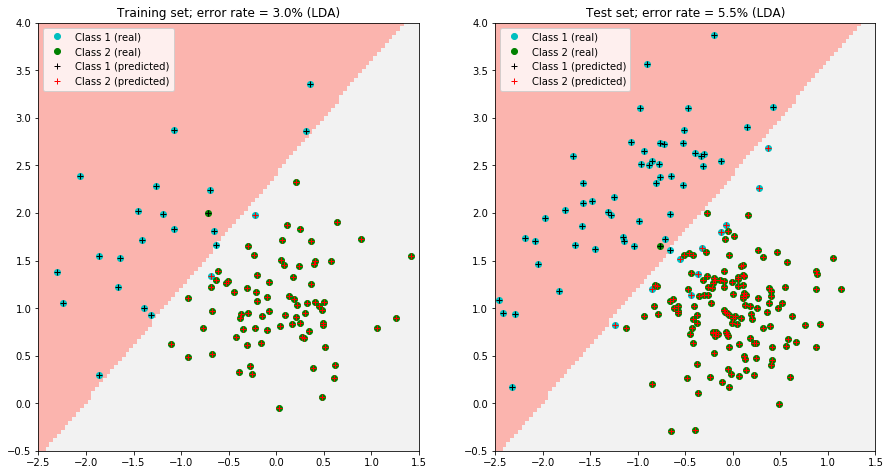

In [44]:
plt.rcParams['figure.figsize'] = 15, 10
# For the training set
plt.subplot(1,2,1)
plt.imshow(predicted_grid_LDA, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(train[train[:,0]==1,1],train[train[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(train[train[:,0]==2,1],train[train[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(predicted_trainset_LDA[predicted_trainset_LDA[:,0]==1,1],predicted_trainset_LDA[predicted_trainset_LDA[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(predicted_trainset_LDA[predicted_trainset_LDA[:,0]==2,1],predicted_trainset_LDA[predicted_trainset_LDA[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Training set; error rate = "+str(train_error_LDA*100)+"% (LDA)")
plt.legend(loc='upper left')

# For the test set
plt.subplot(1,2,2)
plt.imshow(predicted_grid_LDA, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(test[test[:,0]==1,1],test[test[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(test[test[:,0]==2,1],test[test[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(predicted_testset_LDA[predicted_testset_LDA[:,0]==1,1],predicted_testset_LDA[predicted_testset_LDA[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(predicted_testset_LDA[predicted_testset_LDA[:,0]==2,1],predicted_testset_LDA[predicted_testset_LDA[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Test set; error rate = "+str(test_error_LDA*100)+"% (LDA)")
plt.legend(loc='upper left')

plt.show()

## Graphical representation for LDA with non linear features

Let's predict the class on the grid : 

In [45]:
# Creating new x set with non linear feature dependencies
x_nl = np.copy(x)  # adding features : class, x1, x2
x_nl = np.insert(x_nl,2 , x[:,0]*x[:,0], axis = 1) # adding feature x1*x1
x_nl = np.insert(x_nl,3 , x[:,0]*x[:,1], axis = 1) # adding feature x1*x2
x_nl = np.insert(x_nl,4 , x[:,1]*x[:,1], axis = 1) # adding feature x2*x2

In [46]:
predicted_grid_LDA_nl = np.zeros(N,dtype = np.int8)
for i in range(N):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(x_nl[i]-mu_nl_1).T.dot(sigma_inv_nl).dot(x_nl[i]-mu_nl_1))
    p2 = pi_2*np.exp(-1/2*(x_nl[i]-mu_nl_2).T.dot(sigma_inv_nl).dot(x_nl[i]-mu_nl_2))
    # Classification
    if p1 >= p2:
        predicted_grid_LDA_nl[i] = 1
    else:
        predicted_grid_LDA_nl[i] = 2

In [47]:
predicted_grid_LDA_nl = predicted_grid_LDA_nl.reshape(N1,N1)

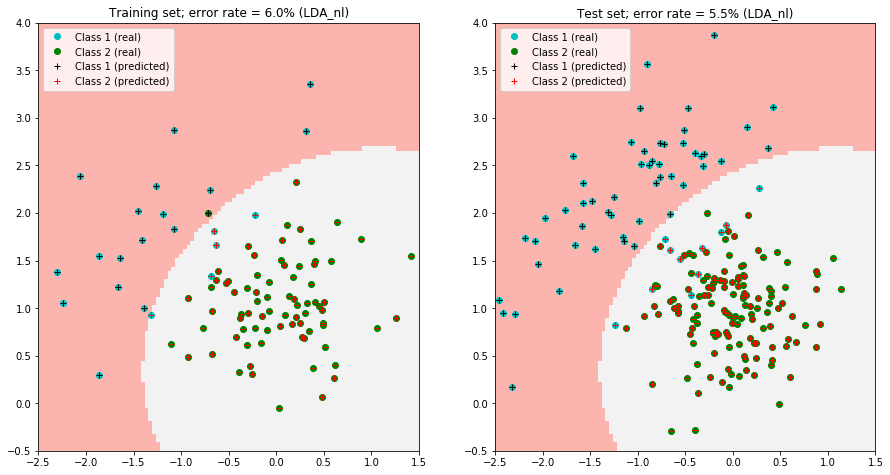

In [48]:

plt.rcParams['figure.figsize'] = 15, 10
# For the training set
plt.subplot(1,2,1)
plt.imshow(predicted_grid_LDA_nl, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(train[train[:,0]==1,1],train[train[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(train[train[:,0]==2,1],train[train[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(predicted_trainset_LDA_nl[predicted_trainset_LDA_nl[:,0]==1,1],predicted_trainset_LDA_nl[predicted_trainset_LDA_nl[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(predicted_trainset_LDA_nl[predicted_trainset_LDA_nl[:,0]==2,1],predicted_trainset_LDA_nl[predicted_trainset_LDA_nl[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Training set; error rate = "+str(train_error_LDA_nl*100)+"% (LDA_nl)")
plt.legend(loc='upper left')

# For the test set
plt.subplot(1,2,2)
plt.imshow(predicted_grid_LDA_nl, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(test[test[:,0]==1,1],test[test[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(test[test[:,0]==2,1],test[test[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(predicted_testset_LDA_nl[predicted_testset_LDA_nl[:,0]==1,1],predicted_testset_LDA_nl[predicted_testset_LDA_nl[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(predicted_testset_LDA_nl[predicted_testset_LDA_nl[:,0]==2,1],predicted_testset_LDA_nl[predicted_testset_LDA_nl[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Test set; error rate = "+str(test_error_LDA_nl*100)+"% (LDA_nl)")
plt.legend(loc='upper left')

plt.show()

## Graphical representation for QDA

In [49]:
predicted_grid_QDA = np.zeros(N,dtype = np.int8)
for i in range(N):
    # Log-probabilities
    p1 = pi_1*np.exp(-1/2*(x[i]-mu_1).T.dot(sigma_1_inv).dot(x[i]-mu_1))
    p2 = pi_2*np.exp(-1/2*(x[i]-mu_2).T.dot(sigma_2_inv).dot(x[i]-mu_2))
    # Classification
    if p1 >= p2:
        predicted_grid_QDA[i] = 1
    else:
        predicted_grid_QDA[i] = 2

In [50]:
predicted_grid_QDA = predicted_grid_QDA.reshape(N1,N1)

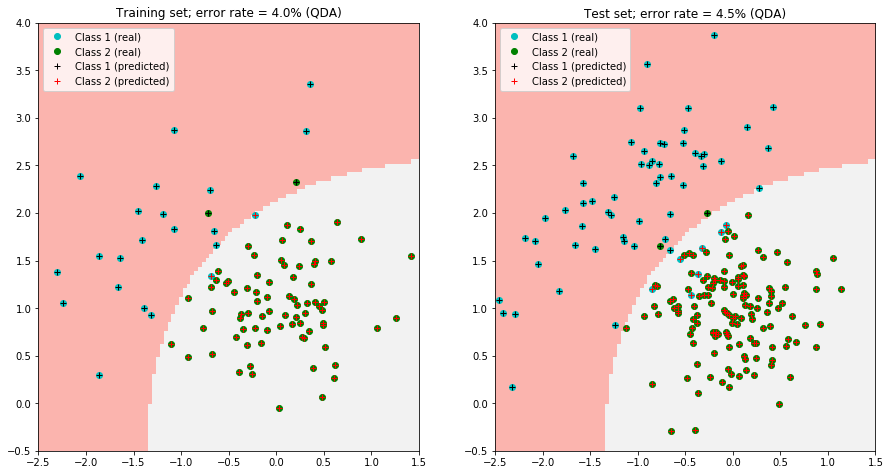

In [51]:
plt.rcParams['figure.figsize'] = 15, 10
# For the training set
plt.subplot(1,2,1)
plt.imshow(predicted_grid_QDA, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(train[train[:,0]==1,1],train[train[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(train[train[:,0]==2,1],train[train[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(predicted_trainset_QDA[predicted_trainset_QDA[:,0]==1,1],predicted_trainset_QDA[predicted_trainset_QDA[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(predicted_trainset_QDA[predicted_trainset_QDA[:,0]==2,1],predicted_trainset_QDA[predicted_trainset_QDA[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Training set; error rate = "+str(train_error_QDA*100)+"% (QDA)")
plt.legend(loc='upper left')

# For the test set
plt.subplot(1,2,2)
plt.imshow(predicted_grid_QDA, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(test[test[:,0]==1,1],test[test[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(test[test[:,0]==2,1],test[test[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(predicted_testset_QDA[predicted_testset_QDA[:,0]==1,1],predicted_testset_QDA[predicted_testset_QDA[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(predicted_testset_QDA[predicted_testset_QDA[:,0]==2,1],predicted_testset_QDA[predicted_testset_QDA[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Test set; error rate = "+str(test_error_QDA*100)+"% (QDA)")
plt.legend(loc='upper left')

plt.show()

In the case of QDA, the boundaries are quadratic. That is because in the case of QDA no assumption is made on the covariance matrixes $\Sigma_{i}$.

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




---

Let's first import the packages we need.

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda

### LDA with scikit-learn module

In [53]:
clf_lda = lda()
clf_lda.fit(trainset,train[:,0])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [54]:
pred_train_LDA_sckl = clf_lda.predict(trainset)
pred_test_LDA_sckl = clf_lda.predict(testset)

In [55]:
pred_train_LDA_sckl= np.reshape(pred_train_LDA_sckl,(-1,1))
pred_train_LDA_sckl = np.concatenate((pred_train_LDA_sckl,trainset),axis = 1)

In [56]:
pred_test_LDA_sckl= np.reshape(pred_test_LDA_sckl,(-1,1))
pred_test_LDA_sckl = np.concatenate((pred_test_LDA_sckl,testset),axis = 1)

In [57]:
train_error_LDA_sckl = 1-clf_lda.score(trainset,train[:,0])
test_error_LDA_sckl = 1-clf_lda.score(testset,test[:,0])

### QDA with scikit-learn module

In [58]:
clf_qda = qda()
clf_qda.fit(trainset,train[:,0])

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [59]:
pred_train_QDA_sckl = clf_qda.predict(trainset)
pred_test_QDA_sckl = clf_qda.predict(testset)

In [60]:
pred_train_QDA_sckl= np.reshape(pred_train_QDA_sckl,(-1,1))
pred_train_QDA_sckl = np.concatenate((pred_train_QDA_sckl,trainset),axis = 1)

In [61]:
pred_test_QDA_sckl= np.reshape(pred_test_QDA_sckl,(-1,1))
pred_test_QDA_sckl = np.concatenate((pred_test_QDA_sckl,testset),axis = 1)

In [62]:
train_error_QDA_sckl = 1-clf_qda.score(trainset,train[:,0])
test_error_QDA_sckl = 1-clf_qda.score(testset,test[:,0])

### Graphical representation for LDA

In [63]:
pred_grid_LDA_sckl = clf_lda.predict(x)
pred_grid_LDA_sckl = pred_grid_LDA_sckl.reshape(N1,N1)
# pred_grid_LDA_sckl = np.rot90(pred_grid_LDA_sckl,k=1,axes=(0,1))

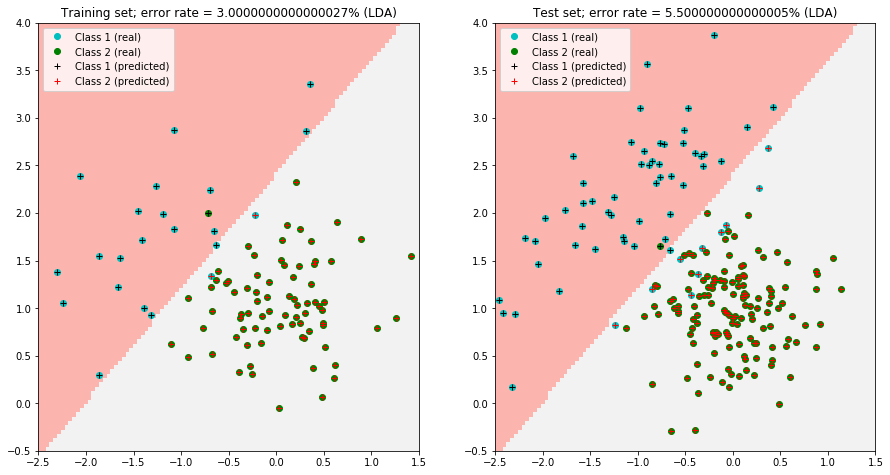

In [64]:
plt.rcParams['figure.figsize'] = 15, 10
# For the training set
plt.subplot(1,2,1)
plt.imshow(pred_grid_LDA_sckl, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(train[train[:,0]==1,1],train[train[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(train[train[:,0]==2,1],train[train[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(pred_train_LDA_sckl[pred_train_LDA_sckl[:,0]==1,1],pred_train_LDA_sckl[pred_train_LDA_sckl[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(pred_train_LDA_sckl[pred_train_LDA_sckl[:,0]==2,1],pred_train_LDA_sckl[pred_train_LDA_sckl[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Training set; error rate = "+str(train_error_LDA_sckl *100)+"% (LDA)")
plt.legend(loc='upper left')

# For the test set
plt.subplot(1,2,2)
plt.imshow(pred_grid_LDA_sckl, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(test[test[:,0]==1,1],test[test[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(test[test[:,0]==2,1],test[test[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(pred_test_LDA_sckl[pred_test_LDA_sckl[:,0]==1,1],pred_test_LDA_sckl[pred_test_LDA_sckl[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(pred_test_LDA_sckl[pred_test_LDA_sckl[:,0]==2,1],pred_test_LDA_sckl[pred_test_LDA_sckl[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Test set; error rate = "+str(test_error_LDA_sckl *100)+"% (LDA)")
plt.legend(loc='upper left')

plt.show()

### Graphical representation for QDA

In [65]:
pred_grid_QDA_sckl = clf_qda.predict(x)
pred_grid_QDA_sckl = pred_grid_QDA_sckl.reshape(N1,N1)

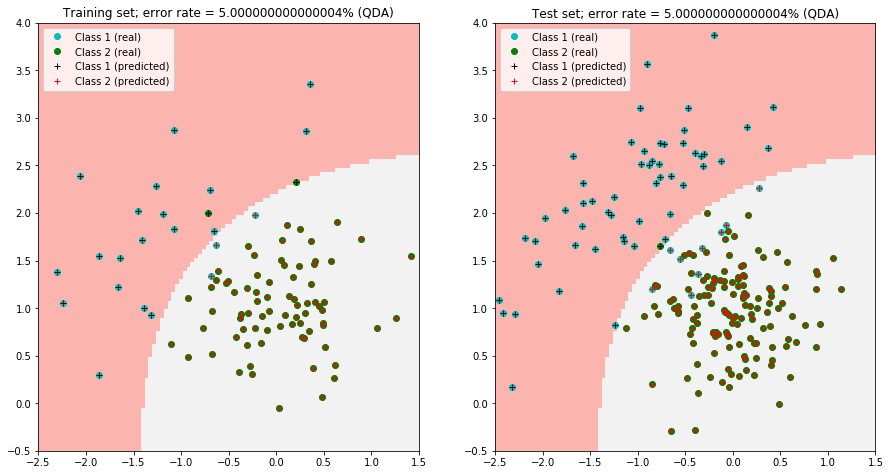

In [66]:
plt.rcParams['figure.figsize'] = 15, 10
# For the training set
plt.subplot(1,2,1)
plt.imshow(pred_grid_QDA_sckl, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(train[train[:,0]==1,1],train[train[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(train[train[:,0]==2,1],train[train[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(pred_train_QDA_sckl[pred_train_QDA_sckl[:,0]==1,1],pred_train_QDA_sckl[pred_train_QDA_sckl[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(pred_train_QDA_sckl[pred_train_QDA_sckl[:,0]==2,1],pred_train_QDA_sckl[pred_train_QDA_sckl[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Training set; error rate = "+str(train_error_QDA_sckl *100)+"% (QDA)")
plt.legend(loc='upper left')

# For the test set
plt.subplot(1,2,2)
plt.imshow(pred_grid_QDA_sckl, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)),cmap = "Pastel1")
# Actual classes
plt.plot(test[test[:,0]==1,1],test[test[:,0]==1,2],'co',label = "Class 1 (real)")
plt.plot(test[test[:,0]==2,1],test[test[:,0]==2,2],'go', label = "Class 2 (real)")
# Predicted classes
plt.plot(pred_test_QDA_sckl[pred_test_QDA_sckl[:,0]==1,1],pred_test_QDA_sckl[pred_test_QDA_sckl[:,0]==1,2],'k+', label = "Class 1 (predicted)")
plt.plot(pred_test_QDA_sckl[pred_test_QDA_sckl[:,0]==2,1],pred_test_QDA_sckl[pred_test_QDA_sckl[:,0]==2,2],'r+', label = "Class 2 (predicted)")
plt.title("Test set; error rate = "+str(test_error_QDA_sckl *100)+"% (QDA)")
plt.legend(loc='upper left')

plt.show()

# Interpretation : 

The LDA has a high bias and a low variance, because it assumes the boundaries are linear.
We computed the LDA with quadratic dependencies on the initial features to get a lower bias (and therefore a higher variance). This LDA with quadratic dependencies is similar to the QDA.
QDA has a lower bias because it does not assume the boundaries are linear. It has a higher variance because it is responsive to small variations of the features.
This illustrates the bias-variance trade-off.


**Comments on the error results : **

Surprisingly, LDA with non linear features has a higher error on the training set (6.5%) than on the test set(4.5%). What's more puzzling is that the error on the training set is also higher than the previous error computed with LDA on the same sample (3%). We expected it would be lower as the model trained on more features, so we do not know what is the reason for that.

For QDA, errors on both train set and test set are similar. This was the most successful model in predicting the targets for the test set, but only by a small margin.


**Comments on scikit-learn LDA and QDA algorithms :**
  
We get the same error values for LDA. with and without scikit-learn.
On the other hand we did not get the same error values for QDA.

Scikit-learn algorithms are easy to use but we have to intialize the parameters in a good way to obtain the best prediction. As we kept the default parameters for both LDA and QDA, we can conclude that the default parameters are not always the best one.